# Loading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_data(file):
    col_names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi",
                 "age", "class"]
    dataframe = pd.read_csv(file, names=col_names)
    return dataframe

filename = "pima-indians-diabetes.csv"

df = load_data(filename)

# Basic operations over the DataFrame

In [5]:
df.head()     

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.groupby("class").size()      # class is a label (1 means having Diabetes & 0 means not having Diabetes) 

class
0    500
1    268
dtype: int64

# Checking correlation for label

In [11]:
df.corr()["class"]

preg     0.221898
plas     0.466581
pres     0.065068
skin     0.074752
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

In [12]:
df.skew()                    # Values closer to zero show less skew

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

# Data Visualization to UNderstand The Data 

In [14]:
from matplotlib import pyplot as plt

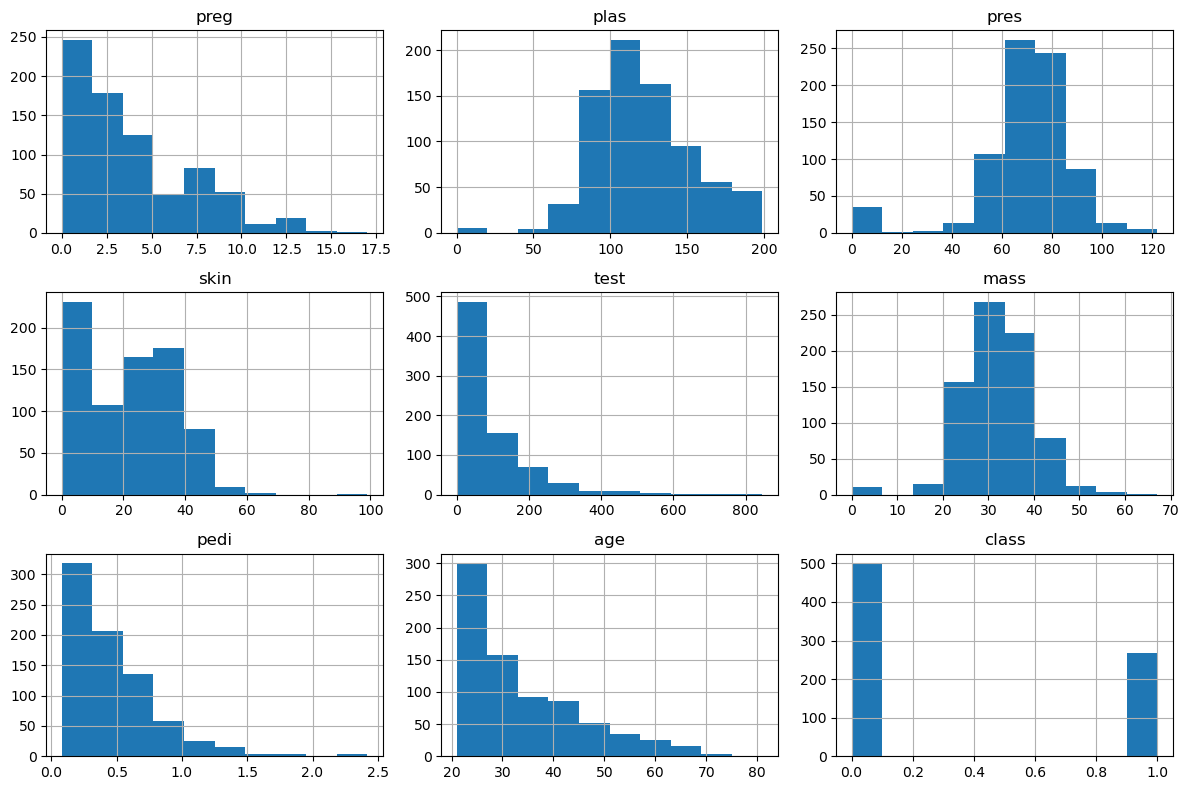

In [15]:
df.hist( figsize=(12, 8))
plt.tight_layout()   # diagram to fit on screen by default
plt.show()

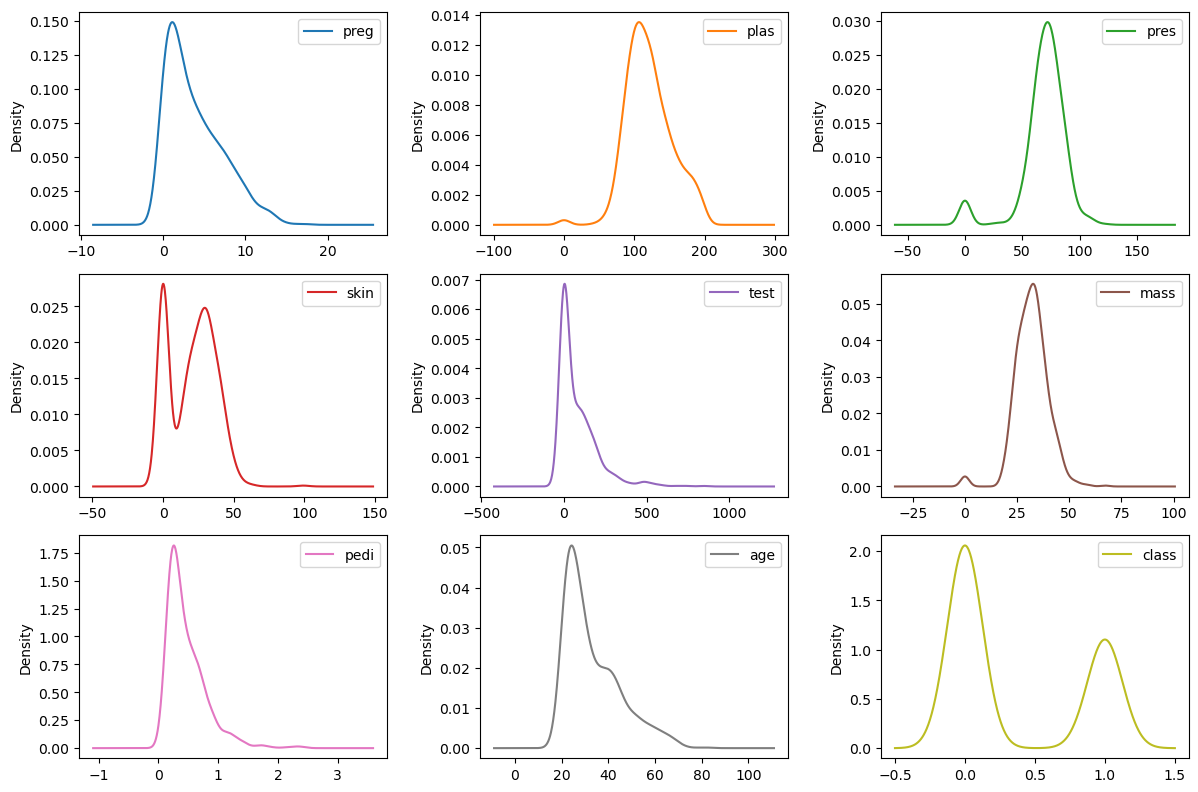

In [16]:
# Plot density plots for each column in the DataFrame
df.plot(kind = "density",subplots = True,layout = (3, 3),sharex = False, figsize = (12, 8))

plt.tight_layout()  

plt.show()

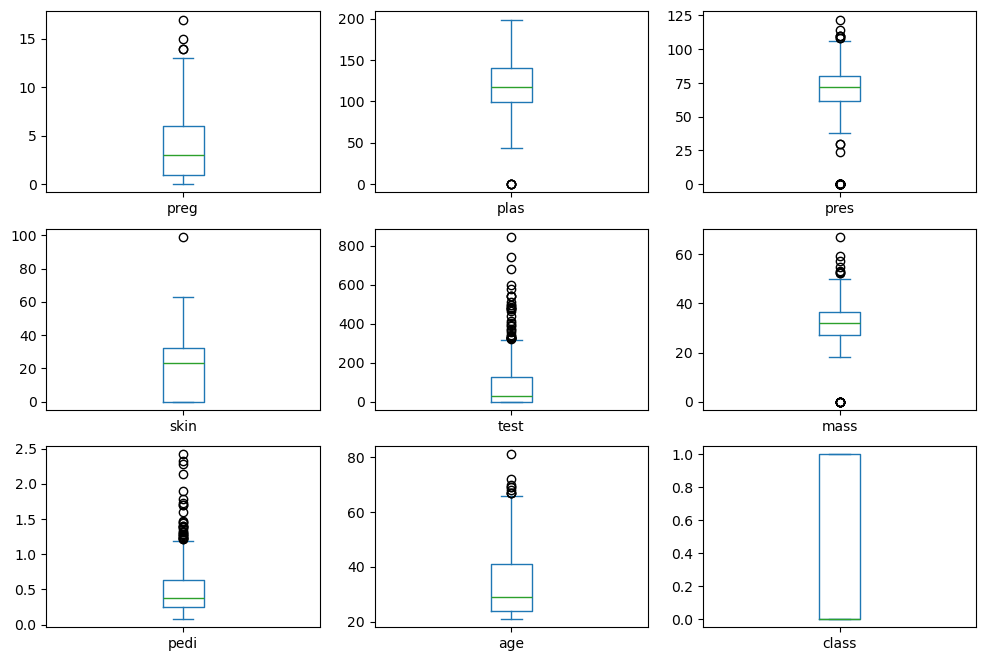

In [17]:
df.plot(kind = "box", subplots = True, layout = (3, 3), sharex = False, sharey = False, figsize = (12, 8))

plt.show()

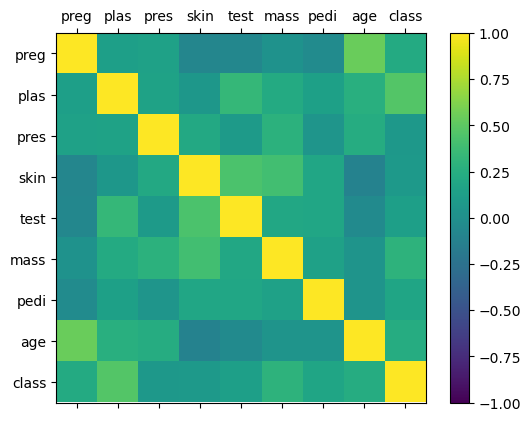

In [18]:
correlations = df.corr()

fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)         # heatmap
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

col_names = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"]
ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)

plt.show()

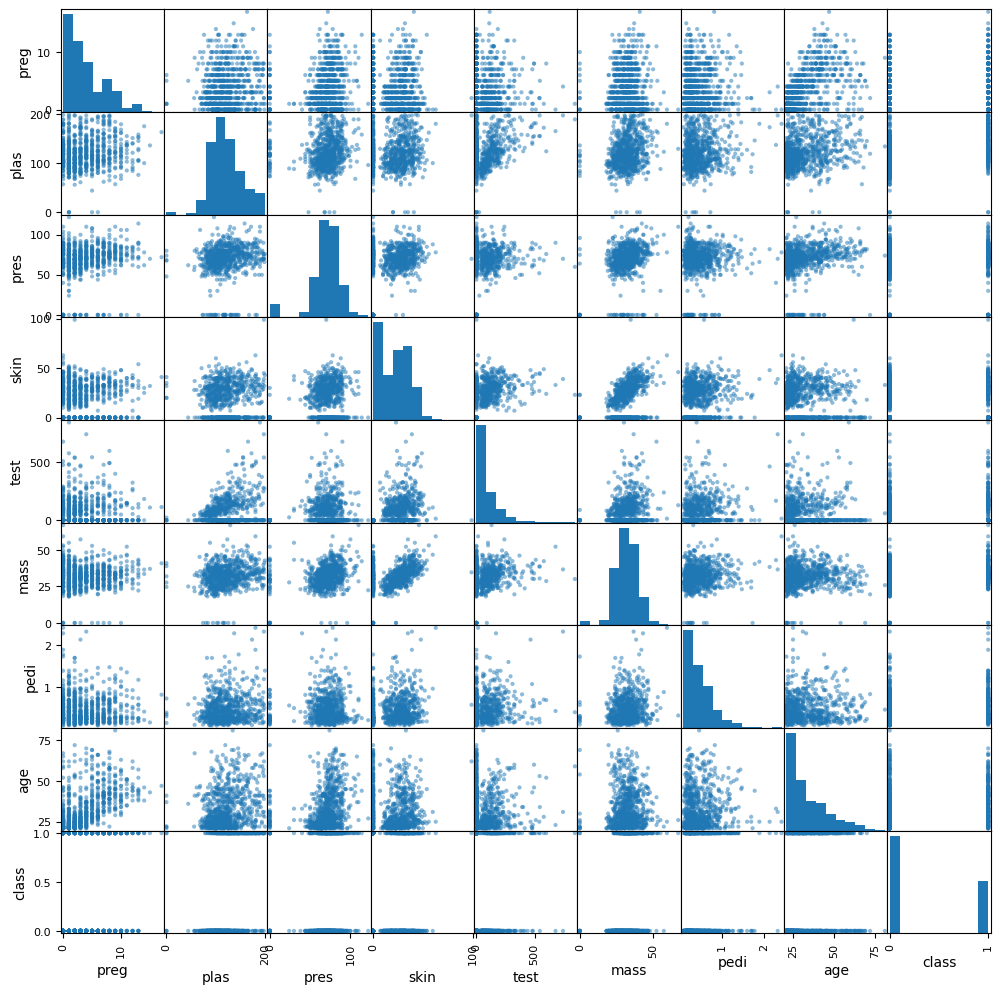

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 12))

plt.show()

# Feature Engineering (Data Processing)

In [21]:
X = df.iloc[:, :8]  # Select all rows and all columns except the last one
y = df.iloc[:, 8]   # Select all rows and only the last column at 9 th index


In [22]:
# Standardizing or Rescale Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with chi-squared test as the scoring function and specify the number of top features to select
test = SelectKBest(score_func=chi2, k=4)

# Fit the selector to the data and transform the feature matrix in one step
features = test.fit_transform(X,y)

# Split the data into training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state = 42)

# Model Selection

In [27]:
# importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
def all_models():
    models = []
    models.append(("LogisticRegression", LogisticRegression(solver="lbfgs", max_iter=3000)))
    models.append(("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()))
    models.append(("KNeighborsClassifier", KNeighborsClassifier()))
    models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
    models.append(("GaussianNB", GaussianNB()))
    models.append(("SVM", SVC()))
    models.append(("RandomForestClassifier", RandomForestClassifier()))
    
    return models

def train_models_scores(algorithms, features, y):
    results = []
    
    for name, algorithm in algorithms:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(algorithm, features, y, cv=kfold, scoring="accuracy")
        results.append({"Model": name, "Mean Accuracy": cv_results.mean(), "Std Dev": cv_results.std()})
    
    results_df = pd.DataFrame(results)
    
    results_df = results_df.sort_values(by="Mean Accuracy", ascending=False)
    
    print(results_df)

# calling the function
train_models_scores(all_models(), features, y)

                        Model  Mean Accuracy   Std Dev
5                         SVM       0.764217  0.060229
0          LogisticRegression       0.757673  0.068165
1  LinearDiscriminantAnalysis       0.755075  0.063725
6      RandomForestClassifier       0.753828  0.064127
4                  GaussianNB       0.748599  0.058056
2        KNeighborsClassifier       0.747317  0.040911
3      DecisionTreeClassifier       0.675803  0.052013


# Model Creation

In [30]:
model = SVC()

# Model Training

In [32]:
model.fit(features,y)

SVC()

# Model Score

In [34]:
result = model.score(features,y)
print(f"Model Accuracy: {result * 100 :.2f}%")

Model Accuracy: 77.47%
